## COVID Graphs Data Analysis

## Nikita Ravindra Gavand


In [301]:
#All the required imports are placed in this section
import pandas as pd
from pandas.io.json import json_normalize
import requests
import urllib.request
import json
import numpy as np
import csv
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

## Task 1: Identify one or more suitable web APIs
During these days, we are hearing a lot of novel coronavirus(COVID-19) pandemic. Every industries wanted to know more about this pandemic. Specially the health care industry, researches and government to take actions over this pandemic. Everyone wants a quick real-time data and analyze all the graphs to take preventive action over this critical crisis.

Here, I have used three APIs which covers most of the part a researcher or any government body needs to see the statistics of this virus. How quickly it is spreading across the world, their states and how quickly it is spreading.

The first API https://api.covid19api.com/summary gives the statistic of each countries with their confirmed cases and deaths and also the recovered cases. It also shows how many are newly recovered  or newly confirmed cases. I found this json object more informative as it distinguish between new cases are old cases. New cases are calculated everyday and changes at GMT.

The second api https://covid-india-api.herokuapp.com/api is specifically of one country. We can take any other countries to analyse their statistics. Here I have taken India to analyze their reports according to the states. We know that India has 28 states and their statistics are given. This JSON object returns all the confirmed cases, cured cases and number of deaths. 

The reason of taking this third api is to show how rapidly this virus is spreading across the globe causing a big trouble to various industrial sectors. The third API https://pomber.github.io/covid19/timeseries.json is a generic api for all the countries in the world on how it is spreading so fast in the given time period. 
Please Note: I have considered only Italy's graph we can also change the country name and retrieve the data accordingly of each country. 

To get the overview of this pandemic this three APIs are enough to get the statistics of each country at a given time period


## Task 2. Data collection, data retrieval, parsing, and storage.

I have collected all the JSON objects and stored in the data objects

The data for url1 is stored covid.csv after parsing through the JSON objects
The data for url2 is stored covid_india.csv after parsing through the JSON objects
The data for url3 is stored covid_daywise_italy.csv after parsing through the JSON objects( Here, I have mentioned the specific attribute "Italy" we can also change to any other country and analyse their statistics of growing rate of pandemic with respect to the period of time.)

In [302]:
url1 = "https://api.covid19api.com/summary"
url2 = "https://covid-india-api.herokuapp.com/api"
url3 = "https://pomber.github.io/covid19/timeseries.json"
try:
    response_1 = urllib.request.urlopen(url1)
    raw_json_1 = response_1.read().decode("utf-8")
    response_2 = urllib.request.urlopen(url2)
    raw_json_2 = response_2.read().decode("utf-8")
    response_3 = urllib.request.urlopen(url3)
    raw_json_3 = response_3.read().decode("utf-8")
except:
    print("Failed to retrive data from API.")
    
# Collect the JSON data from the requested APIs
data_1 = json.loads(raw_json_1)
data_2 = json.loads(raw_json_2)
data_3 = json.loads(raw_json_3)

In [303]:
#Saving the json data in dataframe by json normalization
covid_data_df=json_normalize(data_1,'Countries')  
covid_india_df=json_normalize(data_2['data']['state_data'])
covid_daywise_italy_df=json_normalize(data_3['Italy'])

In [304]:
#Saving these dataframes in a csv file
covid_data_df.to_csv("covid_raw.csv", encoding = "UTF-8", index = False)
covid_india_df.to_csv("covid_india_raw.csv", encoding = "UTF-8", index = False)
covid_daywise_italy_df.to_csv("covid_daywise_italy_raw.csv", encoding = "UTF-8", index = False)

## Task 3: Data pre-processing
Tasks Performed

1.Data Cleaning

2.Removal of Inconsistent data

3.Unused columns and rows removal

In [305]:
# I am dropping unnecessary column for covid_data since it is not useful for analysis of the data.
covid_data_df.drop(['Slug'], axis=1, inplace=True)

#Data Cleaning
# I am dropping unnecessary rows for covid_data (Some extra rows which has no data) 
df1 = covid_data_df.iloc[:,1:6]
covid_data_df.drop([0], axis=0, inplace=True)

In [306]:
#Data Filtering
# Deleting the countries which has zero cases
covid_data_df = covid_data_df[covid_data_df.astype(bool).sum(1) > len(covid_data_df.columns)-6]

#Deleting the days in which italy has zero cases
covid_daywise_italy_df = covid_daywise_italy_df[covid_daywise_italy_df.astype(bool).sum(1) > len(covid_daywise_italy_df.columns)-3]

In [307]:
# Data Inconsistency
# Since all the data of covid_daywise_italy_df.csv was in string format, Converting into integer type
covid_daywise_italy_df['Confirmed Cases'] = covid_daywise_italy_df['confirmed'].astype(int)
covid_daywise_italy_df['Recovered Cases'] = covid_daywise_italy_df['recovered'].astype(int)
covid_daywise_italy_df['Deaths'] = covid_daywise_italy_df['deaths'].astype(int)
covid_daywise_italy_df = covid_daywise_italy_df.drop(['confirmed','recovered','deaths'],axis=1)

In [308]:
# Since all the data of covid india was in string format, Converting into integer type
covid_india_df['Confirmed Cases'] = covid_india_df['confirmed'].astype(int)
covid_india_df['Recovered Cases'] = covid_india_df['cured'].astype(int)
covid_india_df['Deaths'] = covid_india_df['deaths'].astype(int)
covid_india_df = covid_india_df.drop(['confirmed','cured','deaths'],axis=1)

In [309]:
covid_data_df.to_csv("covid.csv", encoding = "UTF-8", index = False)
covid_daywise_italy_df.to_csv("covid_daywise_italy.csv", encoding = "UTF-8", index = False)
covid_india_df.to_csv("covid_india.csv", encoding = "UTF-8", index = False)

## Task 4: Data characterisation and description, including use of summary tables and visualisations.

covid_data_df: Consists of NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered and TotalRecovered of all over the world in a dataframe

covid_india_df: Consists of place,Confirmed, Cases,	Recovered Cases	and Deaths of India in a dataframe

covid_daywise_italy_df: Consists of date,Confirmed Cases,Recovered Cases and Deaths of Italy in a dataframe

Below are the summary of each dataframes and some of the characteristics of which i have taken this dataset for my assignment.


In [310]:
#Visualize top 5 affected countries from novel coronavirus
idx = covid_data_df.sum(axis=1).sort_values(ascending=False).head(5).index
covid_data_df.loc[idx]

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
216,US,19408,140886,441,2467,1593,2665
41,China,123,82122,5,3304,482,75582
103,Italy,5217,97689,756,10779,646,13030
191,Spain,6875,80110,821,6803,2424,14709
76,Germany,4400,62095,100,533,730,9211


In [311]:
#Getting top 5 countries having highest death rate from coronavirus
idx = covid_data_df.TotalDeaths.sort_values(ascending=False).head(5).index
covid_data_df.loc[idx]

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
103,Italy,5217,97689,756,10779,646,13030
191,Spain,6875,80110,821,6803,2424,14709
41,China,123,82122,5,3304,482,75582
99,Iran (Islamic Republic of),2901,38309,123,2640,712,12391
98,Iran,2901,38309,123,2640,712,12391


In [312]:
#Getting top 5 countries having highest recovered people from corona Virus
idx = covid_data_df.TotalRecovered.sort_values(ascending=False).head(5).index
covid_data_df.loc[idx]

,Country,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
41,China,123,82122,5,3304,482,75582
191,Spain,6875,80110,821,6803,2424,14709
103,Italy,5217,97689,756,10779,646,13030
99,Iran (Islamic Republic of),2901,38309,123,2640,712,12391
98,Iran,2901,38309,123,2640,712,12391


In [313]:
#From all the country's data we have sumed up the total cases all over the world
df_suming_data= covid_data_df.drop(['Country'],axis=1)
df_suming_data.sum(axis = 0, skipna = True)

NewConfirmed       62836
TotalConfirmed    781349
NewDeaths           3418
TotalDeaths        36899
NewRecovered       11086
TotalRecovered    172341
dtype: int64

In [314]:
#Summary of the covid table accross all countries in the world
covid_data_df.describe()

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,311.069307,3868.064356,16.920792,182.668317,54.881188,853.173267
std,1564.268390,15694.352374,88.684772,988.365636,251.337152,5680.248756
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,12.500000,140.500000,0.000000,1.000000,0.000000,4.000000
75%,80.750000,819.250000,2.000000,11.750000,2.750000,37.750000
max,19408.000000,140886.000000,821.000000,10779.000000,2424.000000,75582.000000


In [315]:
#Visualize top 5 States affected from corona Virus in India
idx = covid_india_df['Confirmed Cases'].sort_values(ascending=False).head(5).index
covid_india_df.loc[idx]

,id,place,Confirmed Cases,Recovered Cases,Deaths
12,13,Kerala,202,19,1
15,16,Maharashtra,198,25,8
5,6,Delhi,87,6,2
11,12,Karnataka,83,5,3
25,26,Uttar Pradesh,82,11,0


In [316]:
#Getting top 5 state affected from corona Virus in India
idx = covid_india_df['Deaths'].sort_values(ascending=False).head(5).index
covid_india_df.loc[idx]

,id,place,Confirmed Cases,Recovered Cases,Deaths
15,16,Maharashtra,198,25,8
7,8,Gujarat,69,1,6
11,12,Karnataka,83,5,3
14,15,Madhya Pradesh,47,0,3
26,27,West Bengal,22,0,2


In [317]:
#Here we have the total cases in india from each states
df_sum_india= covid_india_df.drop(['id','place'],axis=1)
df_sum_india.sum(axis = 0) 

Confirmed Cases    1205
Recovered Cases     102
Deaths               32
dtype: int64

In [318]:
#Summary of all types of cases in india accross all the states
covid_india_df.describe()

,Confirmed Cases,Recovered Cases,Deaths
count,27.000000,27.000000,27.000000
mean,44.629630,3.777778,1.185185
std,53.397024,6.658328,1.942184
min,1.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000
50%,23.000000,1.000000,0.000000
75%,68.000000,3.500000,1.500000
max,202.000000,25.000000,8.000000


In [319]:
#Data representation of coronvirus spread in Italy from 31st Jan 2020 to till date
covid_daywise_italy_df.head()

,date,Confirmed Cases,Recovered Cases,Deaths
9,2020-1-31,2,0,0
10,2020-2-1,2,0,0
11,2020-2-2,2,0,0
12,2020-2-3,2,0,0
13,2020-2-4,2,0,0


In [320]:
#Summary of the cases in Italy
covid_daywise_italy_df.describe()

,Confirmed Cases,Recovered Cases,Deaths
count,59.000000,59.000000,59.000000
mean,17009.457627,1955.372881,1567.966102
std,27773.831806,3486.659328,2853.798267
min,2.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,1128.000000,46.000000,29.000000
75%,22952.000000,2150.500000,1625.000000
max,97689.000000,13030.000000,10779.000000


## Task 5: Interpretation of results and insights into the data.¶
As we have all the cleaned dataset  we can now use it for plotting to vsualize the data and see some insights
We have three covid datasets

The covid_data_df is used to plot country vs total number of confirmed cases we can also plot against recover cases
I have also plot against the deaths cases to visualize how many countries are majorly affected from this virus.



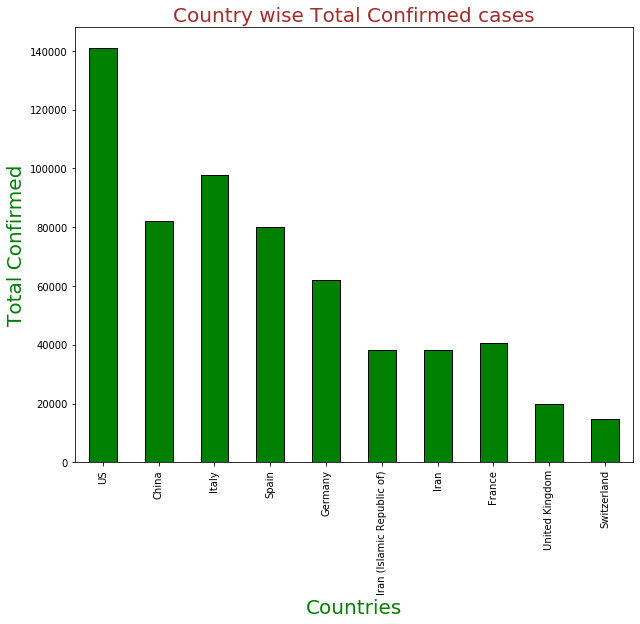

In [321]:
# PLotting 'country' and 'Total Number of confirm cases in the country' for novel coronavirus
idx = covid_data_df.sum(axis=1).sort_values(ascending=False).head(10).index
data = covid_data_df.loc[idx]
matplotlib.rc('figure', figsize=(10, 8))
data.plot(kind='bar',x='Country',y='TotalConfirmed', legend=False, edgecolor='black', color='green')
plt.xlabel('Countries', fontsize=20, color='green')
plt.ylabel('Total Confirmed', fontsize=20, color='green')
plt.title('Country wise Total Confirmed cases', fontsize=20, color='brown')
plt.show()

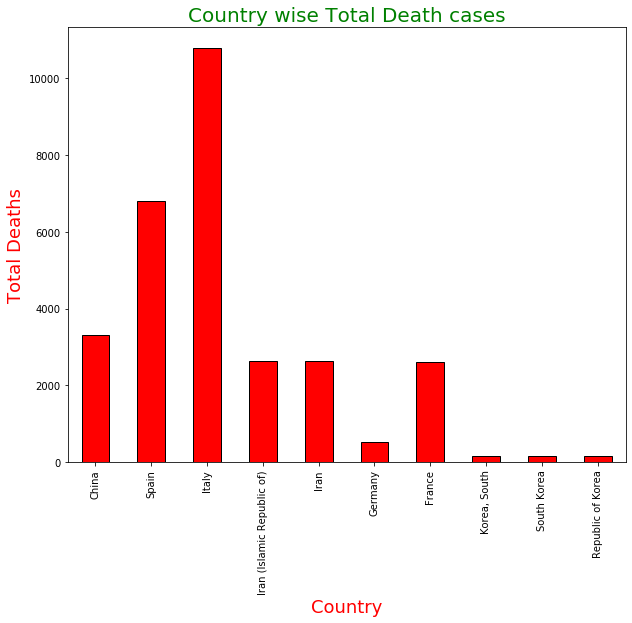

In [322]:
# PLotting 'country' and 'Total Number of death cases in the country' for novel coronavirus
idx = covid_data_df.TotalRecovered.sort_values(ascending=False).head(10).index
data = covid_data_df.loc[idx]
matplotlib.rc('figure', figsize=(10, 8))
data.plot(kind='bar',x='Country',y='TotalDeaths', legend=False, edgecolor='black', color='red')
plt.xlabel('Country', fontsize=18, color='red')
plt.ylabel('Total Deaths', fontsize=18, color='red')
plt.title('Country wise Total Death cases', fontsize=20, color='green')
plt.show()

The "covid_india_df" is used to plot all the affected states in the country. The following plot shows the number of confirmed cases in each state. We can also plot this against death cases and recovery cases to visualize how many death and recovery cases are there in each state. This dataset gives a deeper understanding on each countries and measures to be taken by each state with respect to the increasing number of cases.

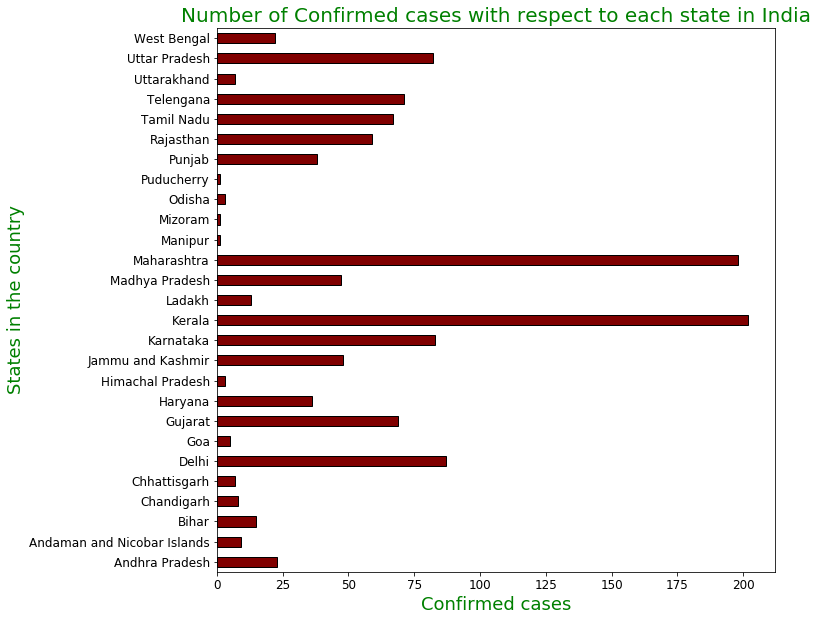

In [323]:
# Funtion to display graph of State VS Number of confirmed cases units of Q2-2019
matplotlib.rc('figure', figsize=(12, 8))
covid_india_df.plot(kind='barh',x='place',y='Confirmed Cases', figsize = (10,10), legend=False,fontsize=12,edgecolor='black', color='maroon')
plt.xlabel('Confirmed cases', fontsize=18, color='green')
plt.ylabel('States in the country', fontsize=18, color='green')
plt.title('Number of Confirmed cases with respect to each state in India', fontsize=20, color='green')
plt.show()

From the above figure, we can see that maharashtra and kerala has the highest confirm cases than any other states in india. We can also observe that in every state there is 1 or more cases. Therefore, appropriate actions should be taken to reduce this pandemic.

"covid_daywise_italy_df" dataset is specifically for Italy on how there was a sudden increase of this pandemic
I have intentionally taken Italy because we can better analyse how this virus has spread exponentially.
As we know that Italy has been badly impacted due to this coronavirus pandemic. By visualizing these graphs we can take precautionary measures to steep this graph

Text(0, 0.5, 'Confirmed Cases')

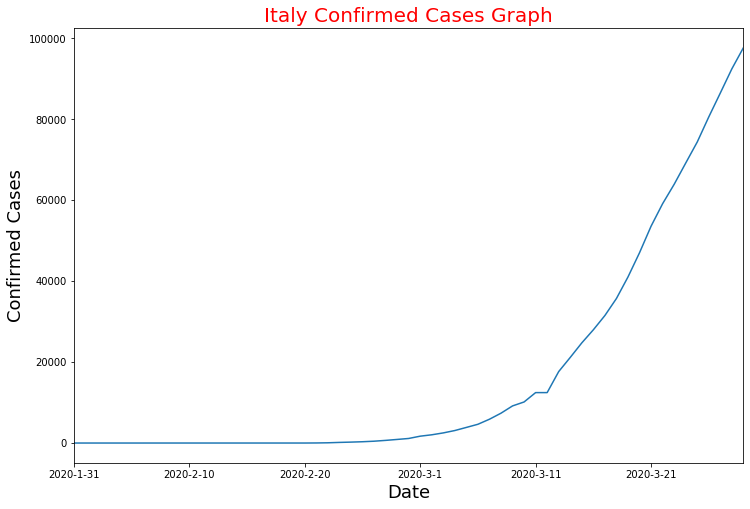

In [324]:
df_temp= covid_daywise_italy_df[['date','Confirmed Cases']]
df_temp.plot(x='date', y='Confirmed Cases', legend=False)
plt.title('Italy Confirmed Cases Graph', fontsize=20, color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Confirmed Cases', fontsize=18)

From the above figure we can see that there was an exponential growth of corona cases in Italy after the end of february.
These insights help us to understand how this virus can affect any other country. 

Text(0.5, 1.0, 'Number of cases in Italy wth respect to the date')

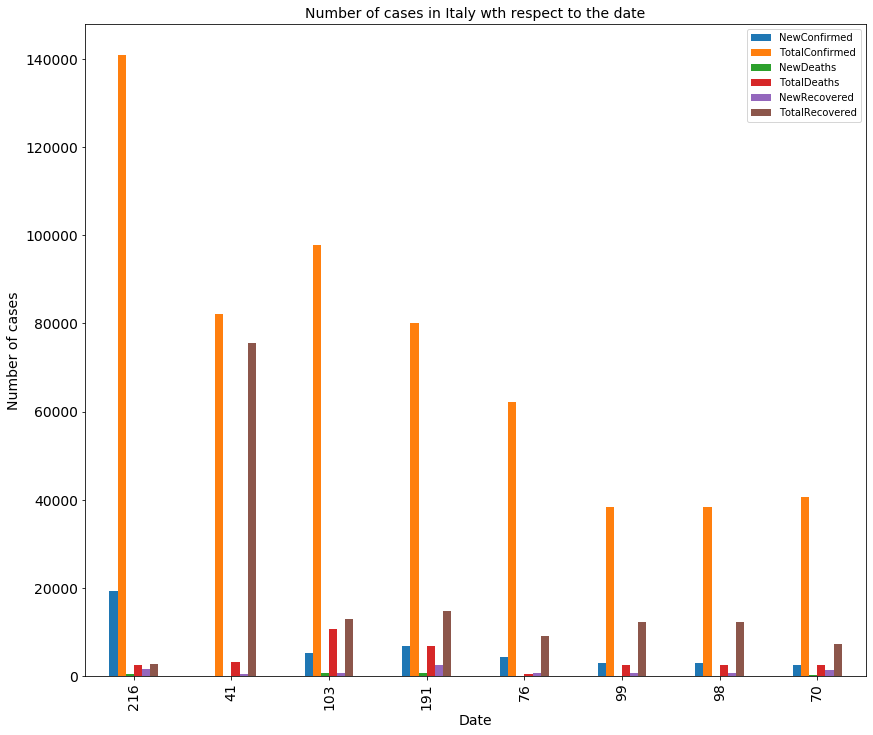

In [325]:
#The below figure gives a brief 
idx = covid_data_df.sum(axis=1).sort_values(ascending=False).head(8).index
data = covid_data_df.loc[idx]
p= data.plot.bar(figsize=(14,12),fontsize=14)
p.set_xlabel("Date",fontsize=14)
p.set_ylabel("Number of cases",fontsize=14)
p.set_title("Number of cases in Italy wth respect to the date",fontsize=14)

The above figure shows the recent number of cases per day in decreasing order. As we can observe the recovery rate is very low as compare to the confirmed cases. Also the death rate is very high. We can also observe that new confirmed cases are also the same every day.  

## Summary:
The current outbreak of coronavirus disease (COVID-19) pandemic is on eye of everyone. Everyone wants an end of this pandemic as soon as possible. Therefore health industry, government sectors and many other industries needs some statistics to analyse all the data of this outbreak and put some measures and solutions accordingly. For future business requirements and how to act over this pandemic can be illustrated better with these statistics. Data is an important aspects for prediction of future by analysing it today. These APIs gives us a good overview of  how to analyse this outbreak in statistical form.
As a data scientist, we should know how do we take this data and preprocess and use it according to the business requirements.


## Future Scope
We can use these statistics to prevent from any other similar outbreak in future. These APIs can be used in machine learning models to predict if there will be an increase or decrease of this pandemic in the future. These statistics will be a lesson to each one of us on how an individual person can control this outbreak.